<a href="https://colab.research.google.com/github/Aayush360/data_science/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Notebook Imports and Packages

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### example 1 - A Simlple cost function

$f(x) = x^2 + x + 1$

In [0]:
def f(x):
  return x**2+x+1

In [3]:
# Make data
x_1 = np.linspace(start=-3, stop=3, num=100)
x_1


array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

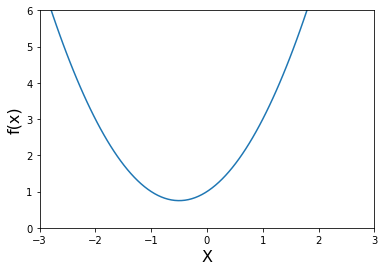

In [4]:
#plot
plt.xlim([-3,3])
plt.ylim([0,6])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

## slopes and derivative


In [0]:
#derivative of the function f(x)

def df(x):
  return 2*x+1

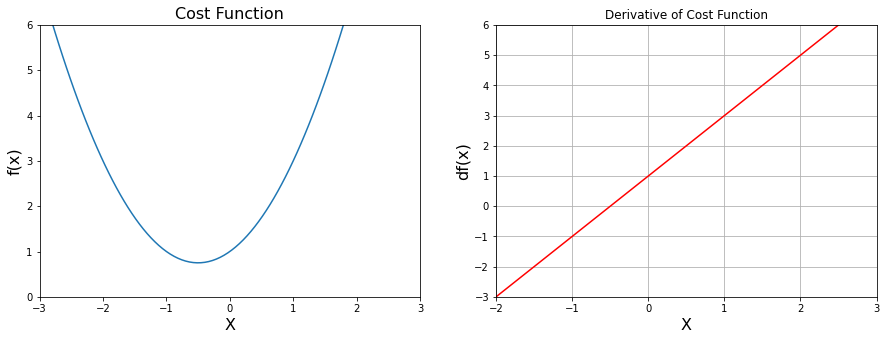

In [6]:
#using the subplot from matplotlib, function and derivative

plt.figure(figsize=[15,5])

#for the first plot: cost function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=16)
plt.xlim([-3,3])
plt.ylim([0,6])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1,f(x_1))

#for the second plot: derivative
plt.subplot(1,2,2)
plt.title('Derivative of Cost Function')
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1,df(x_1), color='red')
plt.show()

## python loops and Gradient Descent


In [7]:
# Gradient Descent

new_x= 3 # starting value
previous_x= 0  # temp value
step_multiplier = 0.1 # learning rate
precision = 0.0001 
x_list = [new_x]
y_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    y_list.append(df(new_x))

    
    #print(step_size)
    if step_size<precision:
      print("step : ",n)
      break

print("the local minimum occurs at: ", new_x)
print("the value of df(x) at new_x is: ", df(new_x))
print("the cost-- f(x) at the point is: ", f(new_x))




step :  40
the local minimum occurs at:  -0.49962781616118024
the value of df(x) at new_x is:  0.0007443676776395236
the cost-- f(x) at the point is:  0.7500001385208099


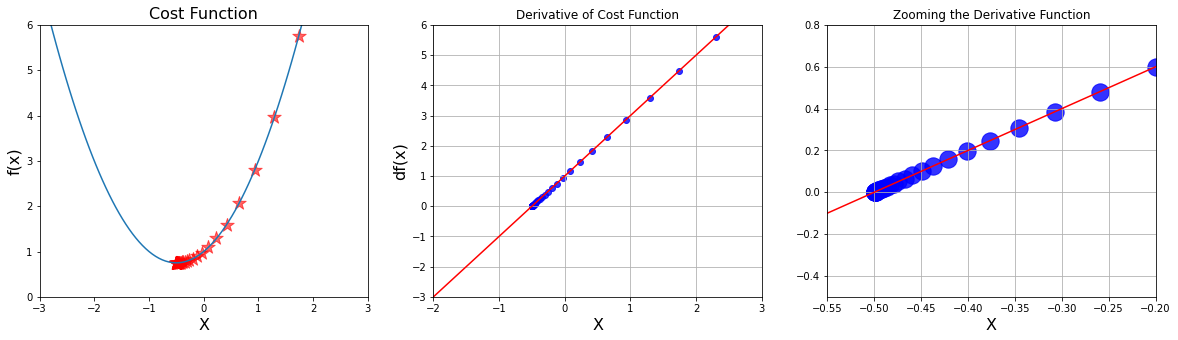

In [8]:
#superimpose the gradient descent problem

plt.figure(figsize=[20,5])

#for the first plot: cost function
plt.subplot(1,3,1)
plt.title('Cost Function', fontsize=16)
plt.xlim([-3,3])
plt.ylim([0,6])
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1,f(x_1))
plt.scatter(x_list, f(np.array(x_list)), color='red', marker='*',s=200, alpha=0.6)

#for the second plot: derivative
plt.subplot(1,3,2)
plt.title('Derivative of Cost Function')
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.plot(x_1,df(x_1), color='red')
plt.scatter(x_list,y_list, color='blue', alpha=0.8)

#for the second plot: derivative
plt.subplot(1,3,3)
plt.title('Zooming the Derivative Function')
plt.xlim([-0.55,-0.2])
plt.ylim([-0.5,0.8])
plt.grid()
plt.xlabel('X', fontsize=16)
plt.plot(x_1,df(x_1), color='red')
plt.scatter(x_list,y_list, color='blue',s=300, alpha=0.8)
plt.show()

##Multiple Minima vs Initial Guess and Advanced Function

### $ g(x)= x^4 -4*x^2 +5 $

In [0]:
#make some data

x_2 = np.linspace(-2,2,1000)

#making a function and it's derivative

def g(x):
  return (x**4 -4*(x**2)+5)

def dg(x):
  return (4*(x**3)-8*x)



In [10]:
print(g(2))
print(g(-2))
print(dg(2))
print(dg(-2))

5
5
16
-16


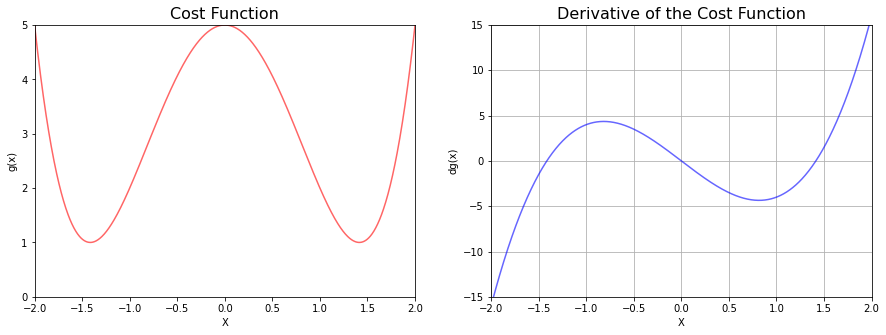

In [11]:
#plotting the graph 
plt.figure(figsize=[15,5])

#first plot to show the cost function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0,5)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.plot(x_2, g(x_2), alpha=0.6, color='red')

#second plot to show the derivative 
plt.subplot(1,2,2)
plt.title('Derivative of the Cost Function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-15,15)
plt.grid()
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.plot(x_2, dg(x_2), alpha=0.6, color='blue')
plt.show()

#### Gradient Descent as a Python Function


In [0]:
def gradient_desc(derivative_func, initial_guess, learning_rate=0.02, precision=0.001, max_iter=300):
    new_x= initial_guess # starting value
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning_rate * gradient
        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        
        #print(step_size)
        if step_size<precision:
          #print("step : ",n)
          break
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_desc(dg,0.5,0.02, 0.001)
print("Local minimum occurs at postion: ", local_min)
print("Number of Steps: ", len(list_x))
print("list of all x_values are: ", list_x)
print("list of derivatives are: ", deriv_list)


Local minimum occurs at postion:  1.4122375085019094
Number of Steps:  23
list of all x_values are:  [0.5, 0.5700000000000001, 0.6463845600000001, 0.7282006598573135, 0.8138209670755288, 0.9009125343861493, 0.9865609632751697, 1.067592934538704, 1.141064281109816, 1.204778782550515, 1.257645254790938, 1.2997339542854778, 1.3320392730310104, 1.356087523785901, 1.3735568198659485, 1.3860113169570543, 1.3947678735885645, 1.4008627390357724, 1.4050746946966322, 1.407970846159076, 1.4099553074429387, 1.411311800743334, 1.4122375085019094]
list of derivatives are:  [-3.5, -3.8192280000000003, -4.090804992865673, -4.28101536091076, -4.354578365531026, -4.282421444451021, -4.051598563176713, -3.6735673285555963, -3.1857250720349457, -2.6433236120211516, -2.104434974726992, -1.6152659372766287, -1.202412537744527, -0.873464804002376, -0.6227248545552868, -0.4378278315755093, -0.3047432723604011, -0.21059778304298504, -0.14480757312219872, -0.09922306419313287, -0.06782466501976359, -0.046285387

In [14]:
local_min, list_x, deriv_list = gradient_desc(dg,-0.1)
print("Local minimum occurs at postion: ", local_min)
print("Number of Steps: ", len(list_x))

Local minimum occurs at postion:  -1.4120887490901561
Number of Steps:  34


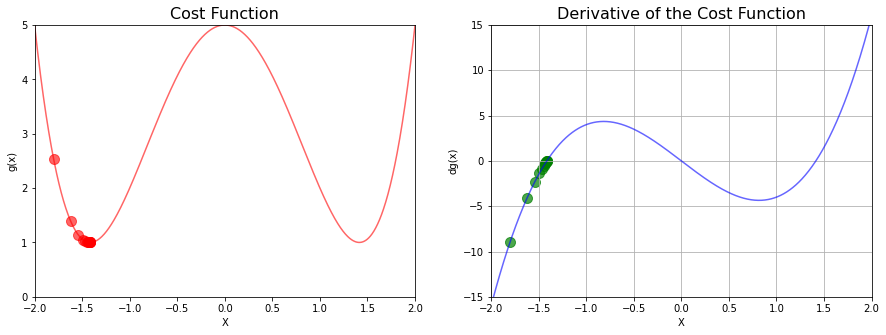

In [15]:
#calling the gradient_descent function

local_min, list_x, deriv_list = gradient_desc(dg,-1.8)

#plotting the graph 
plt.figure(figsize=[15,5])

#first plot to show the cost function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0,5)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.plot(x_2, g(x_2), alpha=0.6, color='red')

plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#second plot to show the derivative 
plt.subplot(1,2,2)
plt.title('Derivative of the Cost Function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-15,15)
plt.grid()
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.plot(x_2, dg(x_2), alpha=0.6, color='blue')

plt.scatter(list_x, deriv_list,s=100,color='g',alpha=0.7)
plt.show()

### Divergence, Overflow and Python Tuples

### $ h(x) = x^5-2x^4+2 $







In [0]:
# make the data

x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
  return x**5 -2*(x**4)+2

def dh(x):
  return 5*(x**4) -8*(x**3)

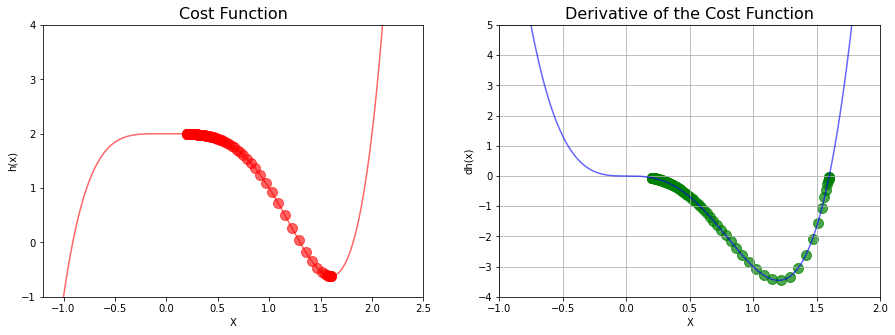

local min occurs at:  1.5989534547394717
cost function corresponding to local min:  -0.6214287992331258
number of steps:  117


In [17]:
#calling the gradient_descent function

local_min, list_x, deriv_list = gradient_desc(dh,0.2)

#plotting the graph 
plt.figure(figsize=[15,5])

#first plot to show the cost function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=16)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X')
plt.ylabel('h(x)')
plt.plot(x_3, h(x_3), alpha=0.6, color='red')

plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#second plot to show the derivative 
plt.subplot(1,2,2)
plt.title('Derivative of the Cost Function', fontsize=16)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()
plt.xlabel('X')
plt.ylabel('dh(x)')
plt.plot(x_3, dh(x_3), alpha=0.6, color='blue')

plt.scatter(list_x, deriv_list,s=100,color='g',alpha=0.7)
plt.show()

print('local min occurs at: ', local_min)
print('cost function corresponding to local min: ', h(local_min))
print('number of steps: ', len(list_x))

In [18]:
import sys
sys.float_info.max

1.7976931348623157e+308

### Python Tuples


In [19]:
#creating a python tuples
breakfast = 'bacon','egg','avacado'
numbers =12,34,23,22

#accessing the values in the tuples
print('I love Having', breakfast[0])
print('I am '+str(numbers[3])+' years old')

#tuples contain mix of different data type-- different form list
#tuples are immutable,, cannot asssign or append,

hello = 'aayush',12,'hell',233
type(hello)

#tuple with a single value

tuple_with_single_value=3,
type(tuple_with_single_value)
print(tuple_with_single_value)

#sequence unpacking in tuples

x, y ,z = breakfast

print(x)

I love Having bacon
I am 22 years old
(3,)
bacon


## Learning Rate

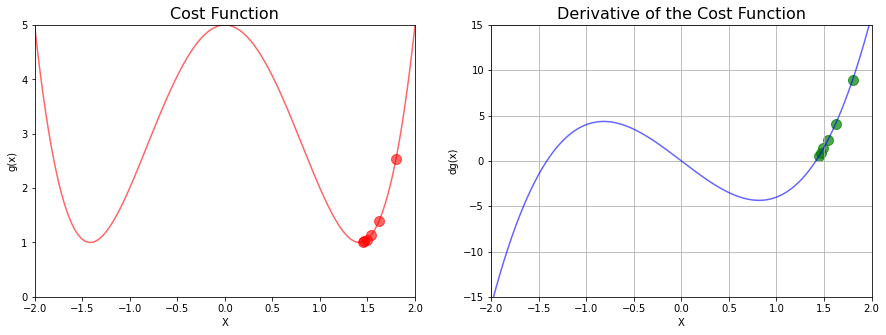

the number of steps is:  6


In [20]:
#calling the gradient_descent function

local_min, list_x, deriv_list = gradient_desc(dg,initial_guess=1.8,learning_rate=0.02,max_iter=5)

#plotting the graph 
plt.figure(figsize=[15,5])

#first plot to show the cost function
plt.subplot(1,2,1)
plt.title('Cost Function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(0,5)
plt.xlabel('X')
plt.ylabel('g(x)')
plt.plot(x_2, g(x_2), alpha=0.6, color='red')

plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#second plot to show the derivative 
plt.subplot(1,2,2)
plt.title('Derivative of the Cost Function', fontsize=16)
plt.xlim(-2,2)
plt.ylim(-15,15)
plt.grid()
plt.xlabel('X')
plt.ylabel('dg(x)')
plt.plot(x_2, dg(x_2), alpha=0.6, color='blue')

plt.scatter(list_x, deriv_list,s=100,color='g',alpha=0.7)
plt.show()

print("the number of steps is: ", len(list_x))

### Data Viz With 3D graphs
#### Minimize $$ f(x,y)= \frac{1}{3^{-x^2-y^2}+1} $$

In [0]:
def f(x,y):
  r = 3**(-x**2-y**2)
  return 1/(r+1)
  

In [22]:
#make data for x and y

x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

#shape of the array

print("shape of x_4",x_4.shape)

#to covert vector into matrix

x_4,y_4 = np.meshgrid(x_4,y_4)

#shape of the array after meshgrid application

print("shape of x_4", x_4.shape)

shape of x_4 (200,)
shape of x_4 (200, 200)


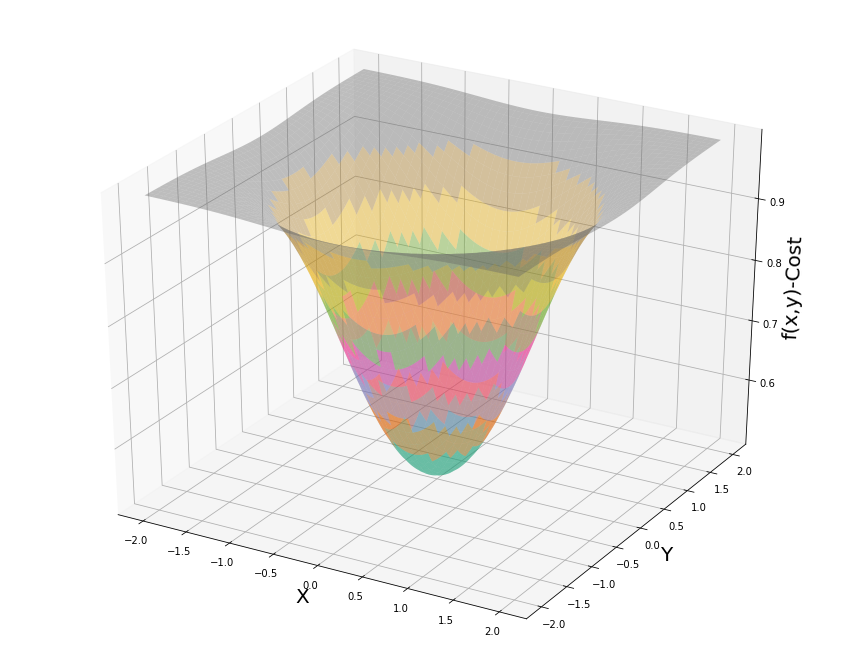

In [23]:
#generating 3d Plots

fig=plt.figure(figsize=[15,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.Dark2, alpha=0.4)
plt.show()

## Partial Derivative and Symbolic Computation
## $$\frac {\partial f} {\partial x} = \frac{2x \ln (3) \cdot 3^{-x^2-y^2}} {\left(3^{-x^2-y^2}+1\right)^2}$$
## $$\frac {\partial f} {\partial y} = \frac{2y \ln (3) \cdot 3^{-x^2-y^2}} {\left(3^{-x^2-y^2}+1\right)^2}$$


In [24]:
a,b = symbols('x,y')
f(a,b)

print('Our cost function is: ', f(a,b))
print('partial derivate of f(x,y) w.r.t x is: ', diff(f(a,b),a))
print('partial derivate of f(x,y) w.r.t y is: ', diff(f(a,b),b))


print('value of f(x,y) at x=1.8 and b=1 is, ',f(a,b).evalf(subs={a:1.8,b:1.0}))
print('value of derivative of f(x,y) at x=1.8 and b=1 is, ',diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))

 #python Dictionary

Our cost function is:  1/(3**(-x**2 - y**2) + 1)
partial derivate of f(x,y) w.r.t x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
partial derivate of f(x,y) w.r.t y is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
value of f(x,y) at x=1.8 and b=1 is,  0.990604794032582
value of derivative of f(x,y) at x=1.8 and b=1 is,  0.0368089716197505


## Batch Gradient Descent With Sympy


In [25]:
#setup 
multiplier = 0.1
max_iter =500
params = np.array([1.8,1.0]) #initial guess for x and y

for n in range(max_iter):
  gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
  gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
  gradients = np.array([gradient_x,gradient_y])
  params = params - multiplier* gradients

#result

print('value of gradients are:', gradients)
print('minimum of x occurs at: ', params[0])
print('minimum of y occurs at: ', params[1])
print('the cost at the minimum value of x and y is: ', f(params[0], params[1]))

value of gradients are: [2.01013037525579e-11 1.11673909736433e-11]
minimum of x occurs at:  3.45838599885832e-11
minimum of y occurs at:  1.92132555492129e-11
the cost at the minimum value of x and y is:  0.500000000000000


In [0]:
#partial derivative function of x and y


def fpx(x,y):
  cons = 3**(-x**2-y**2)
  return (2*x*log(3)*cons/(cons+1)**2)
def fpy(x,y):
  cons = 3**(-x**2-y**2)
  return (2*y*log(3)*cons/(cons+1)**2)


In [27]:
#using fpx and fpy 
multiplier = 0.1
max_iter =500
params = np.array([1.8,1.0]) #initial guess for x and y

for n in range(max_iter):
  gradient_x = fpx(params[0],params[1])
  gradient_y = fpy(params[0],params[1])
  gradients = np.array([gradient_x,gradient_y])
  params = params - multiplier* gradients

#result

print('value of gradients are:', gradients)
print('minimum of x occurs at: ', params[0])
print('minimum of y occurs at: ', params[1])
print('the cost at the minimum value of x and y is: ', f(params[0], params[1]))

value of gradients are: [2.01013038e-11 1.11673910e-11]
minimum of x occurs at:  3.458385998858304e-11
minimum of y occurs at:  1.9213255549212797e-11
the cost at the minimum value of x and y is:  0.5


## Graphing 3-D Gradient Descent and Advanced Numpy Array

In [28]:
#using fpx and fpy 
multiplier = 0.1
max_iter =500
params = np.array([1.8,1.0]) #initial guess for x and y
values_array = params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
  gradient_x = fpx(params[0],params[1])
  gradient_y = fpy(params[0],params[1])
  gradients = np.array([gradient_x,gradient_y])
  params = params - multiplier* gradients
  #values_array = np.append(values_array,params.reshape(1,2), axis=0)
  values_array = np.concatenate((values_array,params.reshape(1,2)),axis=0)
  

#result

print('value of gradients are:', gradients)
print('minimum of x occurs at: ', params[0])
print('minimum of y occurs at: ', params[1])
print('the cost at the minimum value of x and y is: ', f(params[0], params[1]))

(1, 2)
value of gradients are: [2.01013038e-11 1.11673910e-11]
minimum of x occurs at:  3.458385998858304e-11
minimum of y occurs at:  1.9213255549212797e-11
the cost at the minimum value of x and y is:  0.5


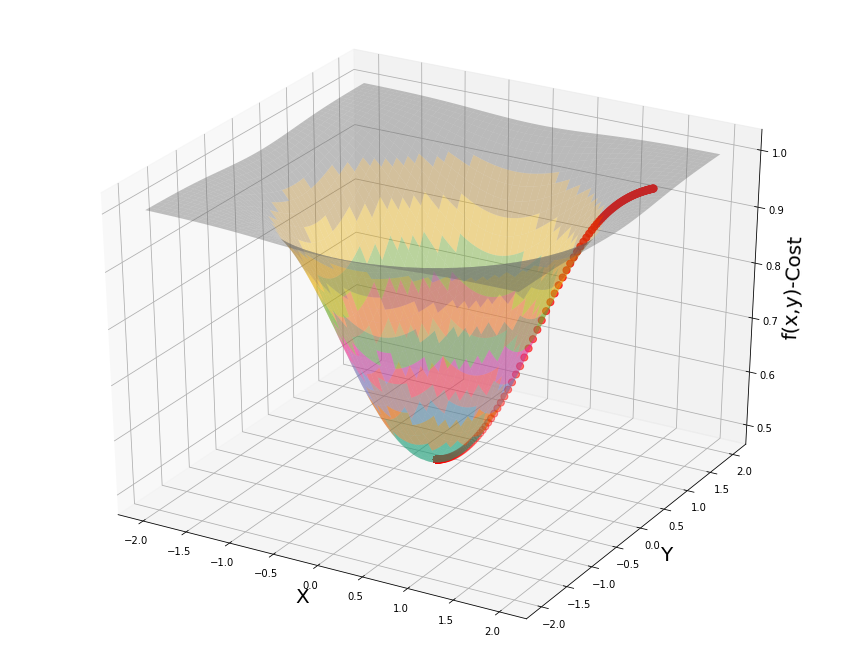

In [29]:
#generating 3d Plots

fig=plt.figure(figsize=[15,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.Dark2, alpha=0.4)
ax.scatter(values_array[:,0],values_array[:,1],f(values_array[:,0],values_array[:,1]),s=50,color='red')
plt.show()

In [30]:
#Advanced Numpy Array Practice

hello = np.array([['Captain','Guitar']])
print(hello.shape)

love =np.array([['Black Thought','MC'],['Qusetlove','Drum']])
print(love.shape)

#accessing the row from the 2-d array

print('love[0] ----->',love[0])

#accessing particular element from the array

print('love[1][2]--------->',love[1][1])

#appending one list to another

new_band = np.append(arr=love, values=hello, axis=0)
print(new_band)
print('shape of the new appended array is: ', new_band.shape)

#taking only the nickname 

print('Nickname of The band members from the Roots: ', new_band[:,0])

#appending the new member 

new_band = np.append(arr=new_band, values=[['Malik B','MC']], axis=0)
print('printing the roles of each members', new_band[:,1])

(1, 2)
(2, 2)
love[0] -----> ['Black Thought' 'MC']
love[1][2]---------> Drum
[['Black Thought' 'MC']
 ['Qusetlove' 'Drum']
 ['Captain' 'Guitar']]
shape of the new appended array is:  (3, 2)
Nickname of The band members from the Roots:  ['Black Thought' 'Qusetlove' 'Captain']
printing the roles of each members ['MC' 'Drum' 'Guitar' 'MC']


## Working with data and real Cost function
### Mean Squared Error, cost function for regression problem
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2$$

### $$ MSE =  \frac {1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}  \big)^2$$
### $$ MSE =  \frac {1}{n}\sum_{i=1}^{n} \big( y - \hat {y}  \big)^2$$

In [36]:
 #make some sample data
 x_5 = np.array([[1.2,2.3,3.2,3,8,4.5,6.5]]).transpose()
 y_5 = np.array([2,3.2,3.6,4.6,6.5,6.4,9.4]).reshape(7,1)

 print('shape of x_5', x_5.shape)
 print('shape of y_5 ', y_5.shape)

shape of x_5 (7, 1)
shape of y_5  (7, 1)


In [32]:
# Quick Linear Regression

regr = LinearRegression()
regr.fit(x_5,y_5)

print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])


Theta 0:  1.493649425287357
Theta 1:  0.8795977011494251


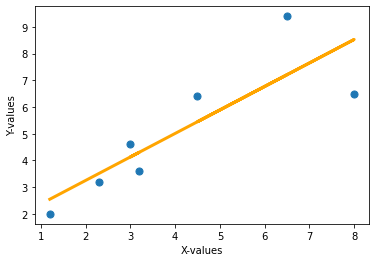

In [33]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5, regr.predict(x_5),color='orange', linewidth=3)
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.show()


In [37]:
# y_hat = theta0 + theta1 * x

y_hat = 1.493649425287357+0.8795977011494251*x_5
print('estimated value of y is: \n',y_hat)
print('actual values of y is: \n',y_5)


estimated value of y is: 
 [[2.54916667]
 [3.51672414]
 [4.30836207]
 [4.13244253]
 [8.53043103]
 [5.45183908]
 [7.21103448]]
actual values of y is: 
 [[2. ]
 [3.2]
 [3.6]
 [4.6]
 [6.5]
 [6.4]
 [9.4]]


In [0]:
# to calculate the mean sum of error

def mse(y_5,y_hat):
  deno = 1/(len(y_5))
  #return deno*np.sum((y_hat-y_5)**2)
  return np.average((y_hat-y_5)**2,axis=0)


In [68]:
# calling the fuction to calculate the error

mse_values = mse(y_5=y_5, y_hat=y_hat)
print('Manually calculated value of MSE is: ',mse_values)
print('MSE calculated from SKlearn is: ',mean_squared_error(y_5,y_hat))
print('MSE calculated by regression', mean_squared_error(y_5,regr.predict(x_5)))

Manually calculated value of MSE is:  [1.56221634]
MSE calculated from SKlearn is:  1.5622163382594418
MSE calculated by regression 1.5622163382594418


### 3D Plot for Mean Squared Error cost function

#### make data for thetas

In [79]:
nr_thetas =200
th_0 = np.linspace(start=-1, stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)

#converting these 1d array into 2d using the meshgrid function

plt_th0, plt_th1 = np.meshgrid(th_0, th_1) #unpacking the sequence
#print(plt_th0)
print('-------------------------')
#print(plt_th1)


-------------------------


### calculate MSE using nested for loops

In [80]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
  for j in range(nr_thetas):
    y_hat= plt_th0[i][j] + plt_th1[i][j] * x_5
    plot_cost[i][j] = mse(y_5=y_5,y_hat=y_hat)


print('Shape of plt_th0', plt_th0.shape)
print('Shape of plt_th1', plt_th1.shape)
print('Shape of plot_cost', plot_cost.shape)


Shape of plt_th0 (200, 200)
Shape of plt_th1 (200, 200)
Shape of plot_cost (200, 200)


In [66]:
# Nested loop practice

for i in range(3):
  for j in range(3):
    print(f'the value of is {i} and value of j is {j}')
    

the value of is 0 and value of j is 0
the value of is 0 and value of j is 1
the value of is 0 and value of j is 2
the value of is 1 and value of j is 0
the value of is 1 and value of j is 1
the value of is 1 and value of j is 2
the value of is 2 and value of j is 0
the value of is 2 and value of j is 1
the value of is 2 and value of j is 2


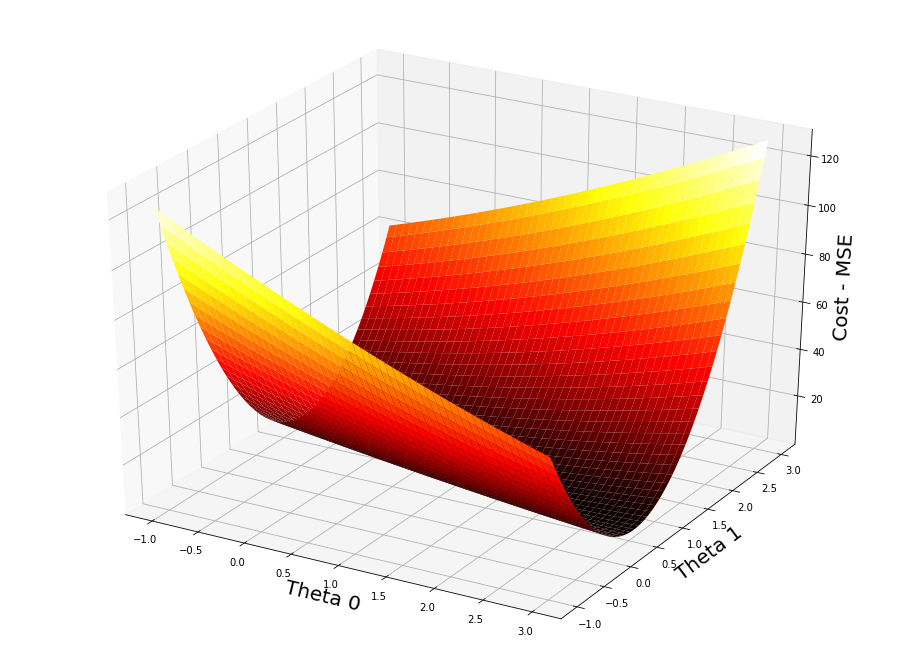

In [82]:
# Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plt_th0, plt_th1, plot_cost, cmap= cm.hot)
plt.show()


In [88]:
print('Minimum value of plot_cost is',plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(),dims=plot_cost.shape)
print('Indices (i,j) where the cost is minimum is: ',ij_min)
print('The minimum cost is: ',plot_cost[94][122])
print('Min MSE for Theta 0 is: ', plt_th0[94][122])
print('Min MSE for Theta 1 is: ', plt_th1[94][122])

Minimum value of plot_cost is 1.5626996432269036
Indices (i,j) where the cost is minimum is:  (94, 122)
The minimum cost is:  1.5626996432269036
Mean MSE for Theta 0 is:  1.4522613065326633
Min MSE for Theta 1 is:  0.8894472361809045


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


### Partial Derivative of MSE w.r.t  $\theta_0$ and $\theta_1$
### $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} {\sum _{i=1}^ {n}\big( y^{(i)}-\theta_0-\theta_1 \cdot x^{(i)}} \big)$$



### $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} {\sum _{i=1}^ {n}\big( y^{(i)}-\theta_0-\theta_1 \cdot x^{(i)}}\big) \cdot {x^{(i)}}$$

### MSE and Gradient Descent

In [0]:
# x values, y values, array of theta parameters (theta 0 at index 0 and theta 1 at index 1)

def grad(x,y,thetas):
  n= y.size

  #create theta0 and theta1 slope to hold the value of valued from the above equation
  cons = -2/n
  theta0_slope = cons* sum(y-thetas[0]-thetas[1]*x)
  theta1_slope = cons * sum((y-thetas[0]-thetas[1]*x)*(x))
  
  #return np.array([theta0_slope[0], theta1_slope[1]]) or
  #return np.append(arr=theta0_slope, values = theta1_slope) or, 
  return np.concatenate((theta0_slope, theta1_slope), axis=0)



In [93]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# collect datapoints for scatterplot

plot_values = thetas.reshape(1,2)
mse_values = mse(y_5, thetas[0]+thetas[1]*x_5)


for i in range(1000):
  thetas = thetas - multiplier* grad(x_5,y_5,thetas)

  # Appending new values to our numpy array

  plot_values = np.concatenate((plot_values,thetas.reshape(1,2)), axis=0)
  mse_values = np.append(mse_values, mse(y_5, thetas[0]+thetas[1]*x_5) )
  
# Results

print('Min occurs at Theta0', thetas[0])
print('Min occurs at Theta1', thetas[1])
print('MSE is : ', mse(y_5, thetas[0]+thetas[1]*x_5 ))



Min occurs at Theta0 1.5055587667018664
Min occurs at Theta1 0.8773330505542125
MSE is :  [1.56224872]


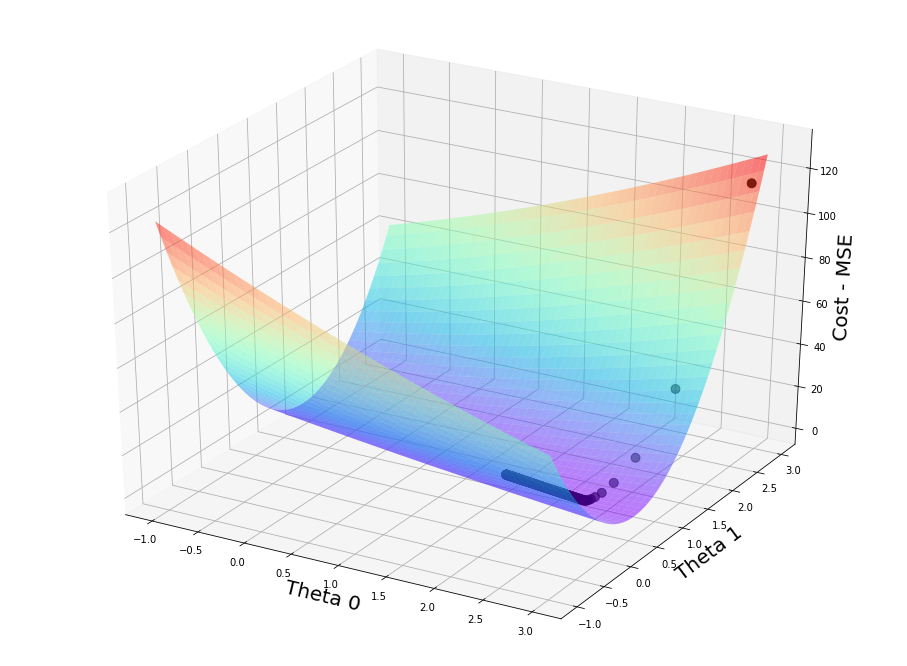

In [96]:
# Plotting MSE

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)
ax.scatter(plot_values[:,0], plot_values[:,1], mse_values, s=80, color='black')
ax.plot_surface(plt_th0, plt_th1, plot_cost, cmap= cm.rainbow, alpha=0.5)
plt.show()
